In [17]:
import pandas as pd
%matplotlib inline

In [18]:
dataset = pd.read_csv("meditation/OpenBCI-RAW-2021-08-05_11-39-54.txt",skiprows=6,header=None) #skiprows = 5, to skip rows conatining metadata
dataset = dataset.T
dataset = dataset.iloc[0:10]
dataset.drop(9,axis=0,inplace=True)
# dataset.drop([0,17,18,19,20,21],axis=0,inplace=True) 

In [19]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,224050,224051,224052,224053,224054,224055,224056,224057,224058,224059
0,3,4,5,6,7,8,9,10,11,12,...,87,88,89,90,91,92,93,94,95,96
1,22284.55,22276.35,22282.39,22281.36,22293.03,22289.65,22295.93,22295.28,22302.75,22288.2,...,17415.99,17412.21,17413.69,17424.93,17426.43,17426.51,17439.52,17439.41,17441.42,17457.81
2,15007.65,15009.06,15018.05,15002.65,15033.8,15014.69,15012.24,15020.15,15014.69,15028.17,...,9222.69,9195.17,9203.02,9215.2,9212.65,9232.03,9205.97,9222.24,9234.49,9238.36
3,27469.96,27472.89,27474.99,27494.08,27485.85,27500.36,27502.1,27499.95,27508.69,27504.78,...,38715.1,38726.14,38713.42,38707.68,38710.85,38705.82,38722.68,38708.66,38714.76,38712.41
4,40256.43,40257.52,40252.11,40263.94,40261.93,40271.67,40274.51,40279.14,40282.22,40283.03,...,61322.16,61335.51,61325.36,61329.43,61329.77,61326.97,61339.24,61323.75,61330.28,61323.93
5,7871.57,7875.91,7870.12,7880.08,7867.46,7878.16,7877.36,7870.18,7881.81,7876.84,...,25582.58,25592.57,25590.38,25595.12,25598.71,25591.79,25601.93,25582.49,25584.77,25575.27
6,63257.2,63262.23,63255.73,63275.75,63269.0,63281.12,63285.39,63287.93,63296.05,63291.46,...,81892.14,81896.92,81896.86,81897.44,81901.73,81893.5,81902.16,81882.48,81878.46,81869.16
7,37883.77,37895.21,37889.11,37908.6,37901.74,37916.63,37921.19,37919.4,37937.41,37930.86,...,61533.37,61542.78,61538.53,61541.77,61543.18,61542.87,61550.11,61522.97,61522.48,61507.08
8,-187500.02,-187500.02,-187500.02,-187500.02,-187500.02,-187500.02,-187500.02,-187500.02,-187500.02,-187500.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import matplotlib.pyplot as plt


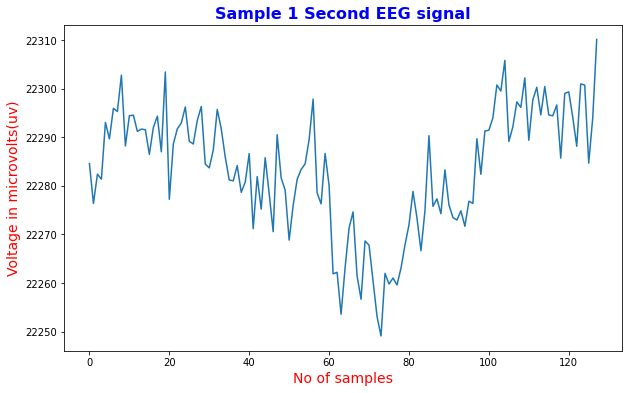

In [21]:
plt.figure(figsize=(10,6))
plt.title("Sample 1 Second EEG signal",fontdict={"color":"blue","fontweight":"bold","fontsize":16})
plt.plot(dataset.iloc[1,:128])
plt.xlabel("No of samples",fontdict={"color":"red","fontsize":14})
plt.ylabel("Voltage in microvolts(uv)",fontdict={"color":"red","fontsize":14})
plt.show()


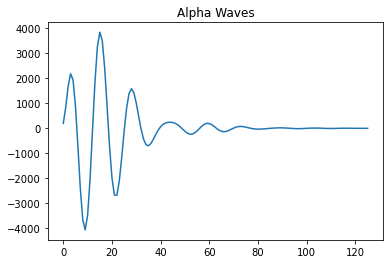

-0.5076698127231793


In [49]:
from scipy.signal import butter,sosfilt
import numpy as np
bw_filter = butter(2,[8,12],"bandpass",output="sos",fs=125)
filtered = sosfilt(bw_filter,dataset.iloc[1,:126])
plt.plot(filtered)
plt.title("Alpha Waves")
plt.show()
print(np.median(filtered))

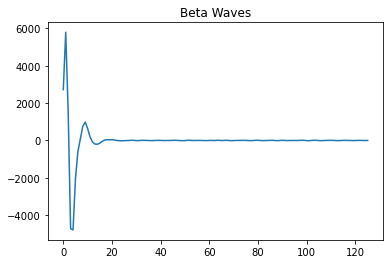

In [37]:
from scipy.signal import butter,sosfilt
bw_filter = butter(2,[12,35],"bandpass",output="sos",fs=125)
filtered = sosfilt(bw_filter,dataset.iloc[2,:126])
plt.plot(filtered)
plt.title("Beta Waves")
plt.show()

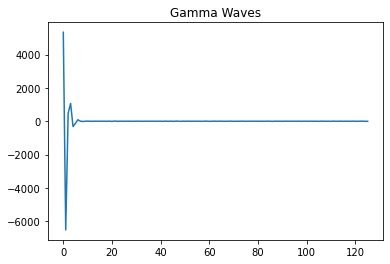

In [38]:
from scipy.signal import butter,sosfilt

bw_filter = butter(2,35,"hp",output="sos",fs=125)
filtered = sosfilt(bw_filter,dataset.iloc[1,:126])
plt.tight_layout()

plt.plot(filtered)
plt.title("Gamma Waves")
plt.show()